In [2]:
import sys
import os

abspath = r"./src/"
sys.path.append(os.path.abspath(abspath ))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from plotting_utils import plot_X
from hd_data import HD_Data

# auto reload modules when they change
%load_ext autoreload
%autoreload 2

plt.style.use('./styles/plots.mplstyle')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Some variables to define notebook bahavior
data_path = 'data/'
save_plots = False
save_plot_path = 'figures/'

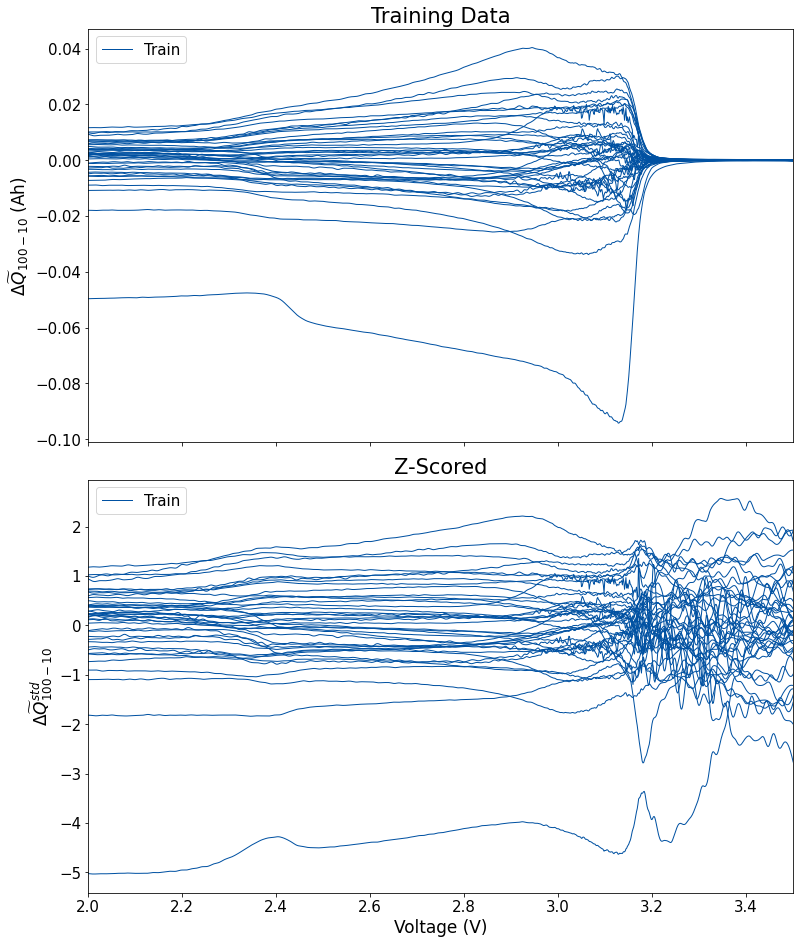

In [9]:
# Read csv to dataframe
df = pd.read_csv('data/r/rv.csv')

# Load the LFP Dataset
lfp_df = pd.read_csv(data_path + 'lfp_slim.csv', index_col=0)

X_lfp = np.array(lfp_df.iloc[:, 0:1000])    
X_lfp = X_lfp[:, ::-1]
y_lfp = np.array(lfp_df.iloc[:, 1000])
x_lfp = np.linspace(2.0, 3.5, 1000)

X_lfp_train = np.array(X_lfp[lfp_df.iloc[:, 1002]==0, :])
y_lfp_train = np.array(y_lfp[lfp_df.iloc[:, 1002]==0])
X_lfp_test = np.array(X_lfp[lfp_df.iloc[:, 1002]==1, :])
y_lfp_test = np.array(y_lfp[lfp_df.iloc[:, 1002]==1])
X_lfp_test2 = np.array(X_lfp[lfp_df.iloc[:, 1002]==2, :])
y_lfp_test2 = np.array(y_lfp[lfp_df.iloc[:, 1002]==2])

fig, ax = plot_X(X_lfp_train, x_lfp)
if save_plots: 
    fig.savefig(save_plot_path + 'TrainingData.pdf') 

lfp_hdata = HD_Data(X_lfp, x_lfp, y_lfp)

lfp_train_hdata = HD_Data(X_lfp_train, x_lfp, y_lfp_train)
lfp_test_hdata = HD_Data(X_lfp_test, x_lfp, y_lfp_test)
lfp_test2_hdata = HD_Data(X_lfp_test2, x_lfp, y_lfp_test2)

In [ ]:
y_lfp_train

Text(0, 0.5, 'Regression Coefficients')

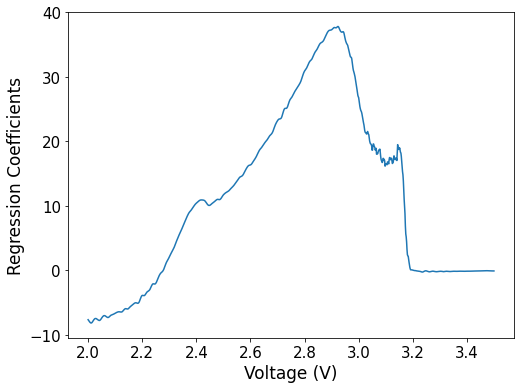

In [12]:
# Improt Ridge Regression from sklearn
from sklearn.linear_model import Ridge
# Fit Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_lfp_train[:, ::-1], y_lfp_train)

# Predict
y_pred = ridge.predict(X_lfp_test)
y_pred2 = ridge.predict(X_lfp_test2)
# plot Regression coefficients
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_lfp, ridge.coef_, label='Ridge Regression')
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Regression Coefficients')

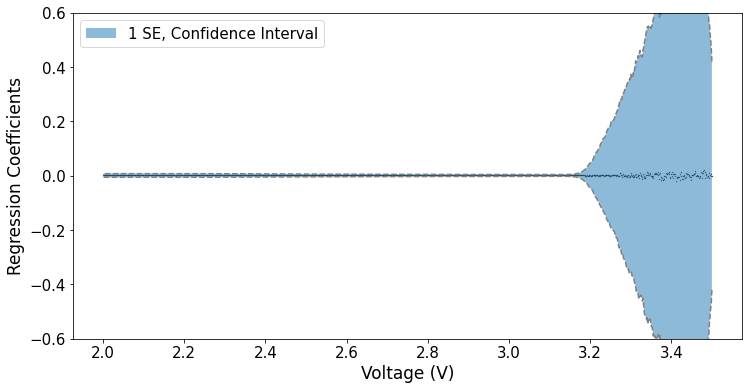

In [10]:
# Make a plot of the data in the first figure and the regeression coefficents in the 
# figure below including the 95% credible intervals.

fig, ax = plt.subplots(figsize=(12, 6))
x_lfp = np.linspace(3.5, 2.0, 1000)

beta_mu = df["mu.coef"].iloc[1:1001]
beta_lower_cf95 = df["CI.coef.1"].iloc[1:1001]
beta_upper_cf95 = df["CI.coef.2"].iloc[1:1001]

beta_lower_1se = beta_mu - df["se.coef"].iloc[1:1001]
beta_upper_1se = beta_mu + df["se.coef"].iloc[1:1001]


ax.scatter(x_lfp, beta_mu, color='black', s=10e-2)
ax.plot(x_lfp, beta_lower_1se, color='grey', linestyle='--')
ax.plot(x_lfp, beta_upper_1se, color='grey', linestyle='--')
ax.fill_between(x_lfp, beta_lower_1se, beta_upper_1se, alpha=0.5, label='1 SE, Confidence Interval')

ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Regression Coefficients')
ax.set_ylim(-0.6, 0.6)
ax.legend()
# visaulize y=0
# ax.axhline(y=0, color='black', linestyle='--')


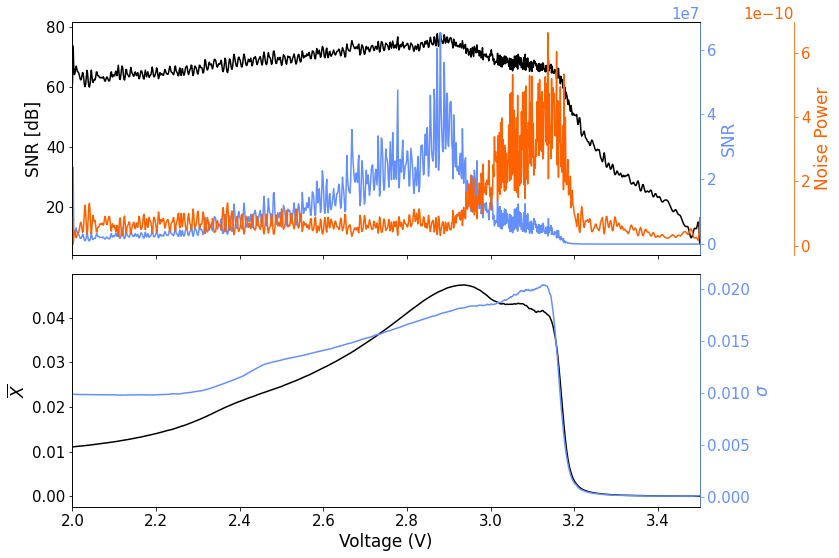

In [5]:
lfp_train_hdata.analyze_snr_by_splines(s=0.0000001, k=3, mode="X_raw", x_label='Voltage (V)')
# lfp_train_hdata.analyze_snr_by_splines(s=0.1, k=3, mode="X_std")
# -> Great! Moise is heteroscedastic, violates the usual assumption!

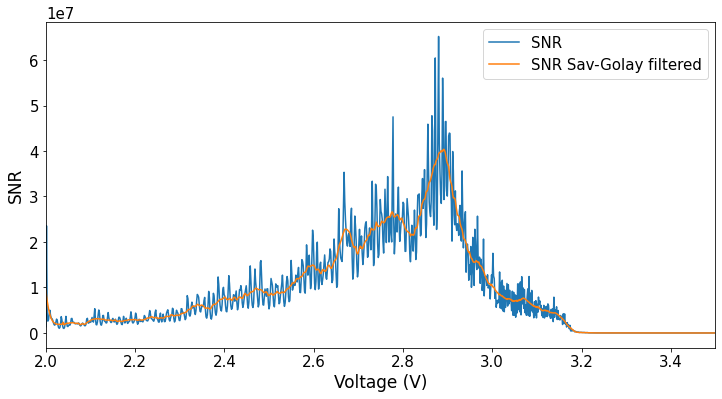

In [20]:
lfp_train_hdata.smooth_snr()

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(lfp_train_hdata.x, lfp_train_hdata.snr, label="SNR")
ax.plot(lfp_train_hdata.x, lfp_train_hdata.snr_smooth, label="SNR Sav-Golay filtered")
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('SNR')
ax.set_xlim(2.0, 3.5)
ax.legend()
plt.show()

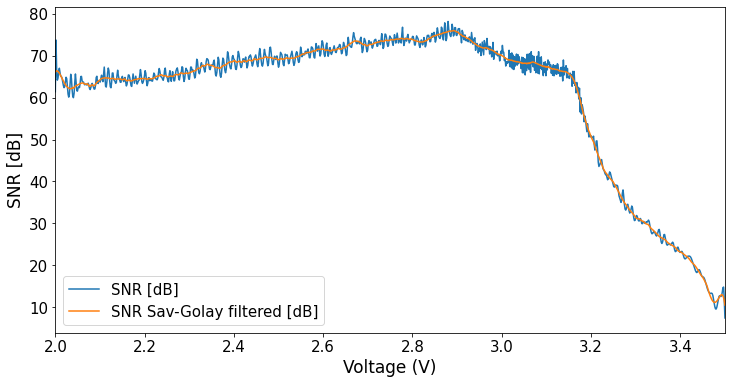

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(lfp_train_hdata.x, lfp_train_hdata.snr_dB, label="SNR [dB]")
ax.plot(lfp_train_hdata.x, lfp_train_hdata.snr_smooth_dB, label="SNR Sav-Golay filtered [dB]")
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('SNR [dB]')
ax.set_xlim(2.0, 3.5)
ax.legend()
plt.show()

In [7]:
# Investigate different priors in the BLR model 


In [8]:
# Next, lets work with the Z-scored data!
# call the R script from python!
# %load_ext rpy2.ipython
# %R source('src/fit_bayesian_penalized_regression.R')

# %R -o df df <- read.csv('data/r/rv_zscore.csv')
# %R -o df df <- df[,-1]



In [9]:
# Revisit the manuscript and change the wording to reflect the new results.
# Think about the hypothesis test and whether that should be done or not.

# Insert this analysis in the Supplementary information.
# (Its an X anlysis only and doiesnt take into account any infromaiton about y.)
# Discuss standardizartion in more detail in the SI.

# Normal regression: Use the SNR standardization to imporve the results (:
# --> It might be that we want to achive a constant signal power?
# Neat, now lets use this information as a prior in the Bayesian linear rgression.
#   Example 1: Synthetic response: Here this will not yield benefits, as the heteroscadasticity is not present in the X y realtionship
#   Example 2: Cycle life response, here things might become interesting.